In [2]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('MS_Dhoni_ODI_record.csv')
df

,score,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,odi_number
0,0,0,1,0,0,0,v Bangladesh,Chattogram,23/12/2004,ODI # 2199
1,12,12,11,109.09,2,0,v Bangladesh,Dhaka,26/12/2004,ODI # 2201
2,7*,7,2,350,0,1,v Bangladesh,Dhaka,27/12/2004,ODI # 2202
3,3,3,7,42.85,0,0,v Pakistan,Kochi,02/04/2005,ODI # 2235
4,148,148,123,120.32,15,4,v Pakistan,Visakhapatnam,05/04/2005,ODI # 2236
...,...,...,...,...,...,...,...,...,...,...
345,56*,56,61,91.8,3,2,v West Indies,Manchester,27/06/2019,ODI # 4175
346,42*,42,31,135.48,4,1,v England,Birmingham,30/06/2019,ODI # 4179
347,35,35,33,106.06,4,0,v Bangladesh,Birmingham,02/07/2019,ODI # 4182
348,DNB,-,-,-,-,-,v Sri Lanka,Leeds,06/07/2019,ODI # 4187


In [4]:
# Basic Check
print(df.head())
print("=================================================================================")
print(df.tail())

  score runs_scored balls_faced strike_rate fours sixes    opposition  \
0     0           0           1           0     0     0  v Bangladesh   
1    12          12          11      109.09     2     0  v Bangladesh   
2    7*           7           2         350     0     1  v Bangladesh   
3     3           3           7       42.85     0     0    v Pakistan   
4   148         148         123      120.32    15     4    v Pakistan   

          ground        date  odi_number  
0     Chattogram  23/12/2004  ODI # 2199  
1          Dhaka  26/12/2004  ODI # 2201  
2          Dhaka  27/12/2004  ODI # 2202  
3          Kochi  02/04/2005  ODI # 2235  
4  Visakhapatnam  05/04/2005  ODI # 2236  
    score runs_scored balls_faced strike_rate fours sixes     opposition  \
345   56*          56          61        91.8     3     2  v West Indies   
346   42*          42          31      135.48     4     1      v England   
347    35          35          33      106.06     4     0   v Bangladesh   

In [5]:
# Data cleaning - Opposition name says 'v Aus' etc we can remove 'v '
# df['opposition'] = df['opposition'].apply(lambda x: x[2:])
df['opposition'] = df ['opposition'].str.replace('v ', '', regex=False)
# regex=False means that the first string ('v ') is not a regex, but a literal String
df

,score,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,odi_number
0,0,0,1,0,0,0,Bangladesh,Chattogram,23/12/2004,ODI # 2199
1,12,12,11,109.09,2,0,Bangladesh,Dhaka,26/12/2004,ODI # 2201
2,7*,7,2,350,0,1,Bangladesh,Dhaka,27/12/2004,ODI # 2202
3,3,3,7,42.85,0,0,Pakistan,Kochi,02/04/2005,ODI # 2235
4,148,148,123,120.32,15,4,Pakistan,Visakhapatnam,05/04/2005,ODI # 2236
...,...,...,...,...,...,...,...,...,...,...
345,56*,56,61,91.8,3,2,West Indies,Manchester,27/06/2019,ODI # 4175
346,42*,42,31,135.48,4,1,England,Birmingham,30/06/2019,ODI # 4179
347,35,35,33,106.06,4,0,Bangladesh,Birmingham,02/07/2019,ODI # 4182
348,DNB,-,-,-,-,-,Sri Lanka,Leeds,06/07/2019,ODI # 4187


In [6]:
# Add a 'feature' - 'year' column using the match date column
# First convert date column into datetime format
df['date'] = pd.to_datetime(df['date'], dayfirst=True)
df['year'] = df['date'].dt.year.astype(int)
df

,score,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,odi_number,year
0,0,0,1,0,0,0,Bangladesh,Chattogram,2004-12-23,ODI # 2199,2004
1,12,12,11,109.09,2,0,Bangladesh,Dhaka,2004-12-26,ODI # 2201,2004
2,7*,7,2,350,0,1,Bangladesh,Dhaka,2004-12-27,ODI # 2202,2004
3,3,3,7,42.85,0,0,Pakistan,Kochi,2005-04-02,ODI # 2235,2005
4,148,148,123,120.32,15,4,Pakistan,Visakhapatnam,2005-04-05,ODI # 2236,2005
...,...,...,...,...,...,...,...,...,...,...,...
345,56*,56,61,91.8,3,2,West Indies,Manchester,2019-06-27,ODI # 4175,2019
346,42*,42,31,135.48,4,1,England,Birmingham,2019-06-30,ODI # 4179,2019
347,35,35,33,106.06,4,0,Bangladesh,Birmingham,2019-07-02,ODI # 4182,2019
348,DNB,-,-,-,-,-,Sri Lanka,Leeds,2019-07-06,ODI # 4187,2019


In [7]:
# create a column to distinguish between out and not out
df['score'] = df['score'].apply(str)
df['not_out'] = np.where(df['score'].str.endswith('*'),1,0)
df.head()

,score,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,odi_number,year,not_out
0,0,0,1,0,0,0,Bangladesh,Chattogram,2004-12-23,ODI # 2199,2004,0
1,12,12,11,109.09,2,0,Bangladesh,Dhaka,2004-12-26,ODI # 2201,2004,0
2,7*,7,2,350,0,1,Bangladesh,Dhaka,2004-12-27,ODI # 2202,2004,1
3,3,3,7,42.85,0,0,Pakistan,Kochi,2005-04-02,ODI # 2235,2005,0
4,148,148,123,120.32,15,4,Pakistan,Visakhapatnam,2005-04-05,ODI # 2236,2005,0


In [8]:
# dropping the odi_number feature because it adds no value to the analysis
df.drop(columns='odi_number',inplace=True)

In [9]:
df

,score,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,year,not_out
0,0,0,1,0,0,0,Bangladesh,Chattogram,2004-12-23,2004,0
1,12,12,11,109.09,2,0,Bangladesh,Dhaka,2004-12-26,2004,0
2,7*,7,2,350,0,1,Bangladesh,Dhaka,2004-12-27,2004,1
3,3,3,7,42.85,0,0,Pakistan,Kochi,2005-04-02,2005,0
4,148,148,123,120.32,15,4,Pakistan,Visakhapatnam,2005-04-05,2005,0
...,...,...,...,...,...,...,...,...,...,...,...
345,56*,56,61,91.8,3,2,West Indies,Manchester,2019-06-27,2019,1
346,42*,42,31,135.48,4,1,England,Birmingham,2019-06-30,2019,1
347,35,35,33,106.06,4,0,Bangladesh,Birmingham,2019-07-02,2019,0
348,DNB,-,-,-,-,-,Sri Lanka,Leeds,2019-07-06,2019,0


In [10]:
# dropping those innings where Dhoni did not bat and storing in a new DataFrame
# Take all the columns, starting with runs_scored

df_new = df.loc[((df['score'] != 'DNB') & (df['score'] != 'TDNB')), 'runs_scored' :]
df_new

,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,year,not_out
0,0,1,0,0,0,Bangladesh,Chattogram,2004-12-23,2004,0
1,12,11,109.09,2,0,Bangladesh,Dhaka,2004-12-26,2004,0
2,7,2,350,0,1,Bangladesh,Dhaka,2004-12-27,2004,1
3,3,7,42.85,0,0,Pakistan,Kochi,2005-04-02,2005,0
4,148,123,120.32,15,4,Pakistan,Visakhapatnam,2005-04-05,2005,0
...,...,...,...,...,...,...,...,...,...,...
344,28,52,53.84,3,0,Afghanistan,Southampton,2019-06-22,2019,0
345,56,61,91.8,3,2,West Indies,Manchester,2019-06-27,2019,1
346,42,31,135.48,4,1,England,Birmingham,2019-06-30,2019,1
347,35,33,106.06,4,0,Bangladesh,Birmingham,2019-07-02,2019,0


In [11]:
# Fixing the data types of numerical columns
df_new['runs_scored'] = df_new['runs_scored'].astype(int)
df_new['balls_faced'] = df_new['balls_faced'].astype(int)
df_new['strike_rate'] = df_new['strike_rate'].astype(float)
df_new['fours'] = df_new['fours'].astype(int)
df_new['sixes'] = df_new['sixes'].astype(int)

In [12]:
# Career stats
first_match_date = df['date'].dt.date.min().strftime('%B %d, %Y')  # first match
print('first match:', first_match_date)

first match: December 23, 2004


In [13]:
last_match_date = df['date'].dt.date.max().strftime('%B %d, %Y')  # last match
print('last match:', last_match_date)

last match: July 09, 2019


In [14]:
number_of_matches = df.shape[0]  # number of matches played in career
print('Number if matches played: ', number_of_matches)

Number if matches played:  350


In [15]:
number_of_innings = df_new.shape[0]
print('Number of innings played: ', number_of_innings)

Number of innings played:  297


In [16]:
not_out = df_new['not_out'].sum()
print('No of not out : ', not_out)

No of not out :  84


In [17]:
runs_scored = df_new['runs_scored'].sum()
print('Runs Scored in career: ', runs_scored)

Runs Scored in career:  10773


In [18]:
print('Ball Faced in career: ', df_new['balls_faced'].sum())

Ball Faced in career:  12303


In [19]:
strike_rate = runs_scored/number_of_innings
print('Career Average: {:.2f}'.format(strike_rate))

Career Average: 36.27


In [20]:
career_avg = runs_scored/(number_of_innings - not_out)
print('Career Average: {:.2f}'.format(career_avg))

Career Average: 50.58


In [21]:
hundreds = (df_new['runs_scored'] >= 100).sum()
print('Number of hundreds: ', hundreds)

Number of hundreds:  10


In [22]:
fifties = ((df_new['runs_scored'] >= 50) & (df_new['runs_scored'] < 100)).sum()
print('Number of fifties: ', fifties)

Number of fifties:  73


In [23]:
fours = df_new['fours'].sum()
print('Number of fours: ', fours)

Number of fours:  826


In [24]:
sixes = df_new['sixes'].sum()
print('Number of sixes: ', sixes)

Number of sixes:  229


In [25]:
# Number of matches played against different oppositions
# count the occurances of each unique value in the 'opposition column
opposition_counts = df['opposition'].value_counts()
print(opposition_counts)

opposition
Sri Lanka       67
Australia       55
England         48
West Indies     39
South Africa    37
Pakistan        36
New Zealand     28
Bangladesh      21
Zimbabwe         6
Africa XI        3
Hong Kong        2
Ireland          2
Afghanistan      2
Bermuda          1
Scotland         1
Netherlands      1
U.A.E.           1
Name: count, dtype: int64


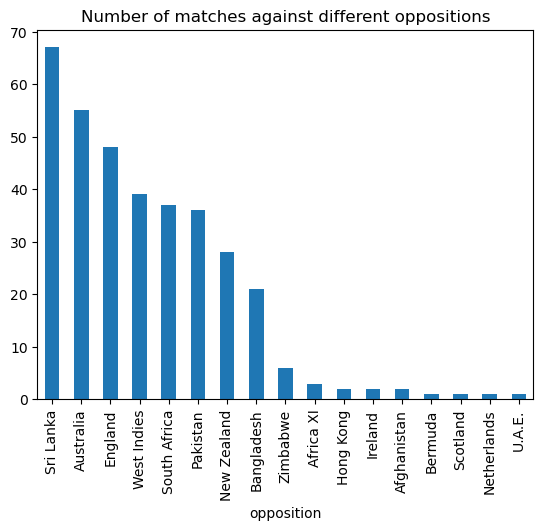

In [26]:
opposition_counts.plot(kind='bar', title='Number of matches against different oppositions')
figsize=(10,6)
plt.show()

In [27]:
# Runs scored against each team
# Group the DataFrame by 'opposition' column
grouped_by_opposition = df_new.groupby('opposition')
print(grouped_by_opposition)

In [28]:
# sum the 'runs_scored' column for each group
sum_of_runs_scored = grouped_by_opposition['runs_scored'].sum()
print(sum_of_runs_scored)

opposition
Afghanistan       36
Africa XI        174
Australia       1660
Bangladesh       569
Bermuda           29
England         1546
Hong Kong        109
Ireland           34
Netherlands       19
New Zealand      940
Pakistan        1231
South Africa     830
Sri Lanka       2383
West Indies     1005
Zimbabwe         208
Name: runs_scored, dtype: int32


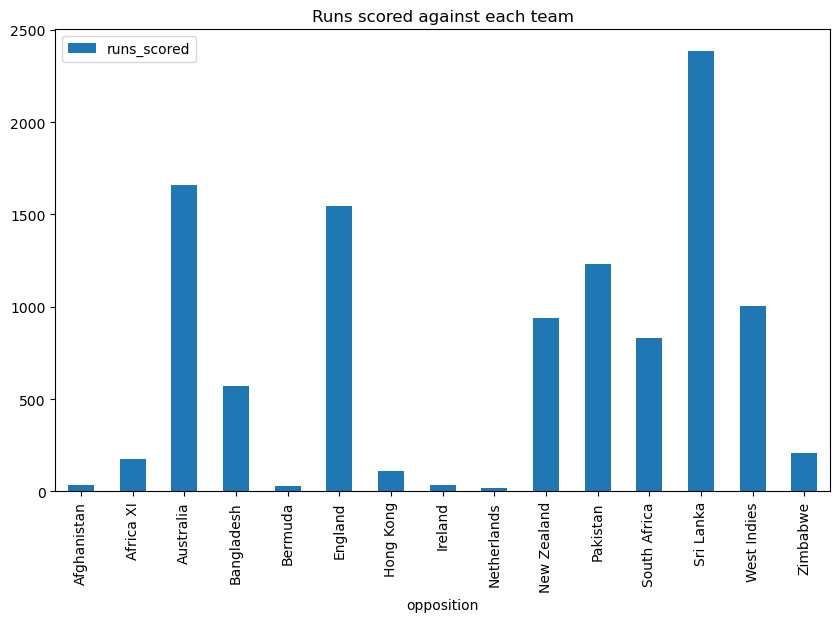

In [29]:
# Sum_of_runs_scored is a series with a labelle index, which is opposition
runs_scored_by_opposition = pd.DataFrame(sum_of_runs_scored).reset_index()
runs_scored_by_opposition.plot(x='opposition', kind='bar', title='Runs scored against each team', figsize=(10,6))
plt.show()

# **Continue on Day- 4**

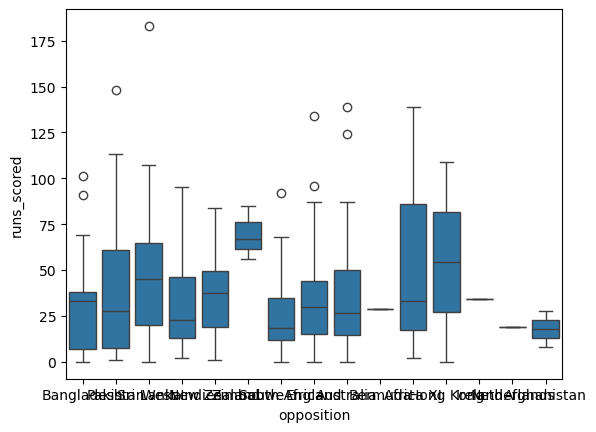

In [30]:
# Boxplot of runs against various oppositions
import seaborn as sns
sns.boxplot(x = 'opposition', y = 'runs_scored', data = df_new)
plt.show()

In [31]:
# Looks crowded - Let us contain only major values
# List of opposition to filter 
opposition_list = ['England', 'Australia', 'West Indies', 'South Africa', 'New Zealand', 'Pakistan', ' Sri Lanka', 'Bangladesh']

# Filter roes where 'Oppositioon' is in the list 
df_filtered = df_new[df_new['opposition'].isin(opposition_list)]

# Sort the filtered DataFrame in decending order of 'run_scored'
df_filtered = df_filtered.sort_values(by ='runs_scored')

# Display the filtered DataFrame
df_filtered

,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,year,not_out
0,0,1,0.00,0,0,Bangladesh,Chattogram,2004-12-23,2004,0
273,0,3,0.00,0,0,Australia,Canberra,2016-01-20,2016,0
223,0,4,0.00,0,0,England,Birmingham,2013-06-23,2013,0
171,0,1,0.00,0,0,Australia,Visakhapatnam,2010-10-20,2010,0
66,0,3,0.00,0,0,Bangladesh,Port of Spain,2007-03-17,2007,0
...,...,...,...,...,...,...,...,...,...,...
211,113,125,90.40,7,3,Pakistan,Chennai,2012-12-30,2012,1
146,124,107,115.88,9,3,Australia,Nagpur,2009-10-28,2009,0
284,134,122,109.83,10,6,England,Cuttack,2017-01-19,2017,0
228,139,121,114.87,12,5,Australia,Mohali,2013-10-19,2013,1


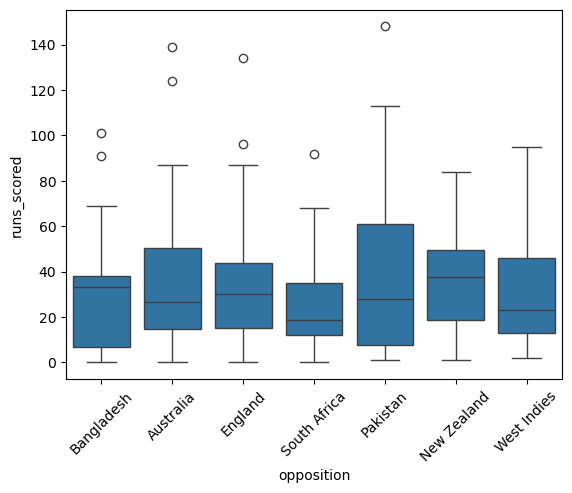

In [32]:
# Rewdraw boxplot but on filtered opposition list 
sns.boxplot(x='opposition', y = 'runs_scored', data= df_filtered)
plt.xticks(rotation = 45)
plt.show()

# **Histogram**

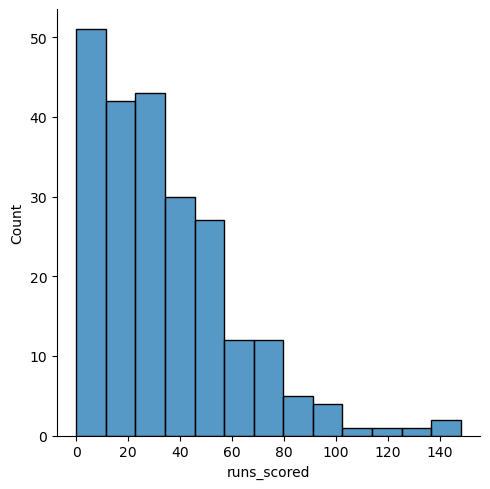

In [33]:
# histogram (distplot) with and without kde ( Kernel Denstity
sns.displot(data=df_filtered, x = 'runs_scored', kde = False)         # without KDE
plt.show()
# We see that there is a right/positive  skew

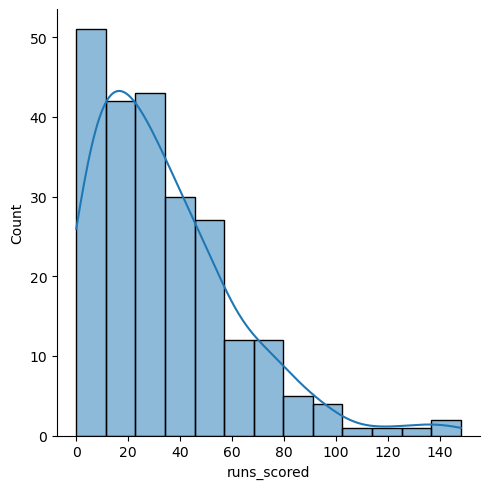

In [34]:
sns.displot(data=df_filtered, x = 'runs_scored', kde = True)         # With KDE
plt.show()

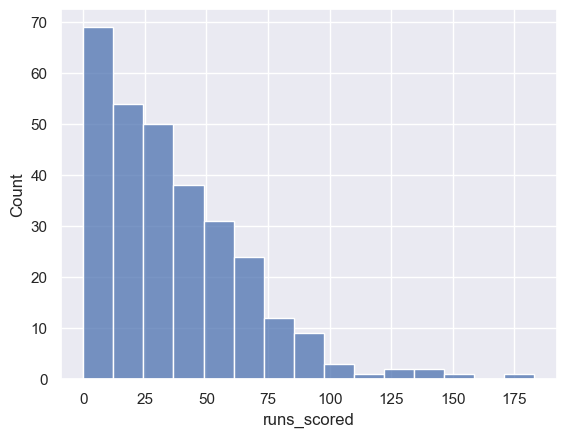

In [35]:
# Histogram with bins
sns.set(style='darkgrid')
sns.histplot(data=df_new, x = 'runs_scored', bins = 15)
plt.show()

In [36]:
# KDE is used in   :  Displot
# Bins is used in  :  Hist plot

# **KDE plot**

In [37]:
# KDE is used to estimate probability

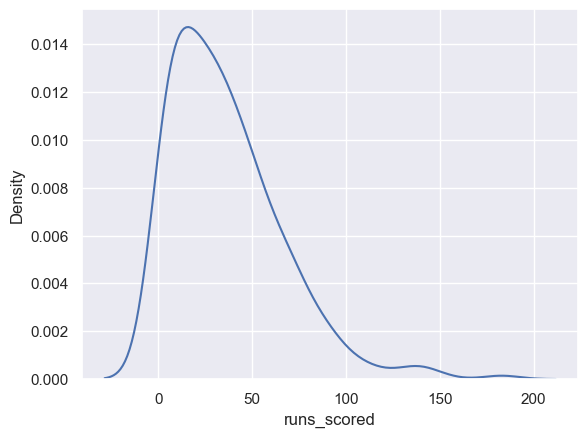

In [38]:
plt.figure(figure=(12,8))
sns.kdeplot(data=df_new, x = 'runs_scored')
plt.show()

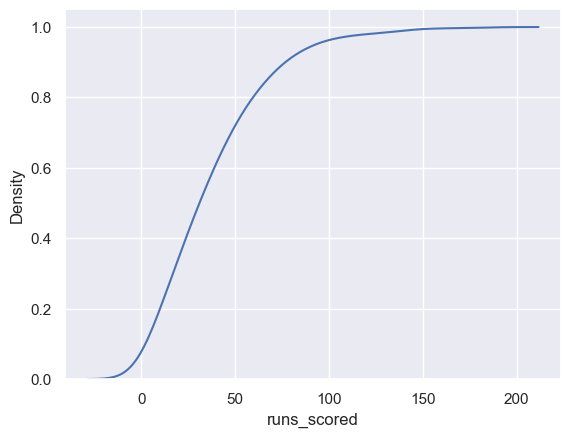

In [39]:
# KDE plot with cumulative probability
plt.figure(figure=(12,8))
sns.kdeplot(data=df_new, x = 'runs_scored',cumulative=True)
plt.show()

# **Joint plot**

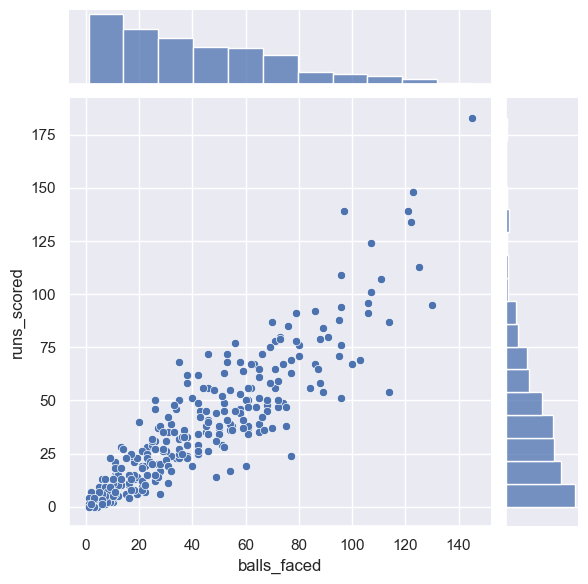

In [40]:
sns.jointplot(x='balls_faced',y='runs_scored',data=df_new, kind ='scatter')
plt.show()

# **Heat Map**

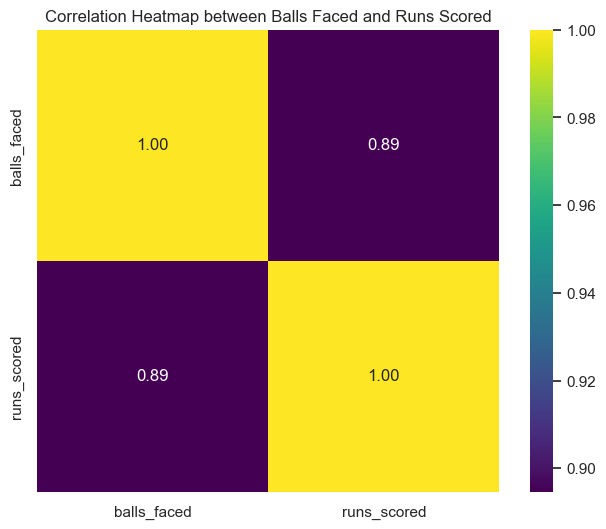

In [41]:
# Calculate the correlation matrix
correlation_matrix = df_new[['balls_faced','runs_scored']].corr()

# Create the HeatMap
plt.figure(figsize = (8,6))
sns.heatmap(data = correlation_matrix,annot = True, cmap= 'viridis', square = True, fmt='.2f')
plt.title('Correlation Heatmap between Balls Faced and Runs Scored')
plt.show()

In [42]:
sum_of_runs_scored = grouped_by_opposition['runs_scored'].sum()
print(sum_of_runs_scored)
print("\n++++++++++++++++++++++++++++++++++++++++++\n")
sum_of_balls_faced = grouped_by_opposition['balls_faced'].sum()
print(sum_of_balls_faced)

opposition
Afghanistan       36
Africa XI        174
Australia       1660
Bangladesh       569
Bermuda           29
England         1546
Hong Kong        109
Ireland           34
Netherlands       19
New Zealand      940
Pakistan        1231
South Africa     830
Sri Lanka       2383
West Indies     1005
Zimbabwe         208
Name: runs_scored, dtype: int32

++++++++++++++++++++++++++++++++++++++++++

opposition
Afghanistan       69
Africa XI        139
Australia       2052
Bangladesh       682
Bermuda           25
England         1758
Hong Kong         99
Ireland           50
Netherlands       40
New Zealand     1140
Pakistan        1361
South Africa     950
Sri Lanka       2645
West Indies     1108
Zimbabwe         185
Name: balls_faced, dtype: int32


In [43]:
strick_rate = (sum_of_runs_scored / sum_of_balls_faced)*100
strick_rate

opposition
Afghanistan      52.173913
Africa XI       125.179856
Australia        80.896686
Bangladesh       83.431085
Bermuda         116.000000
England          87.940842
Hong Kong       110.101010
Ireland          68.000000
Netherlands      47.500000
New Zealand      82.456140
Pakistan         90.448200
South Africa     87.368421
Sri Lanka        90.094518
West Indies      90.703971
Zimbabwe        112.432432
dtype: float64

In [44]:
#sns.heatmap(strick_rate,linewidth = 0.5,annot = True, fmt='.2f',cmap = 'viridis')
#plt.show()

# DAY-6

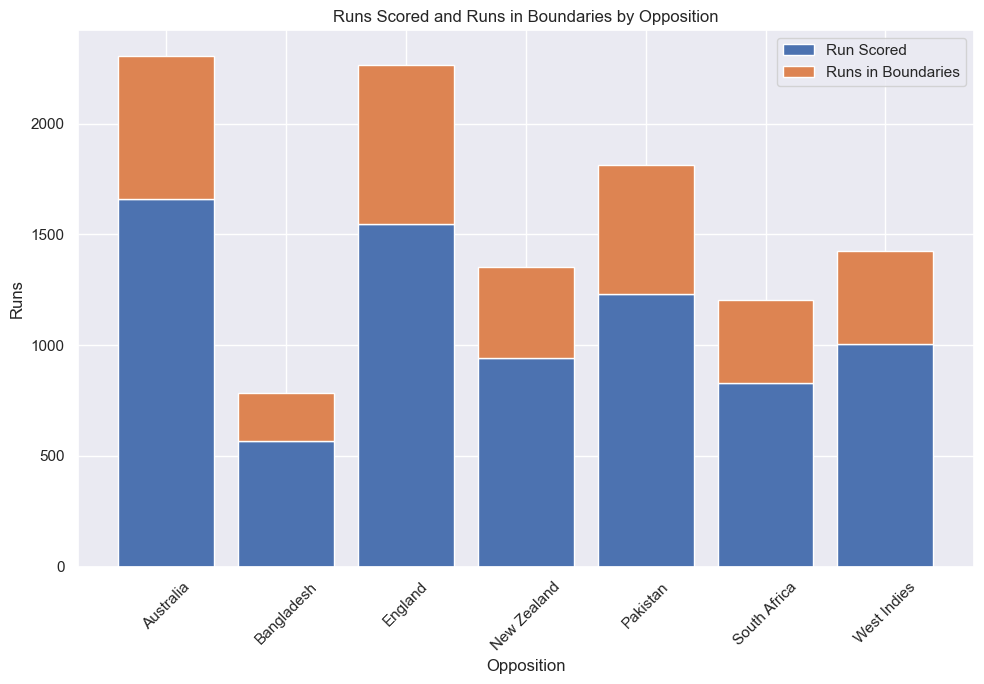

In [45]:
runs_by_boundary = df_filtered[['opposition','runs_scored','fours','sixes']].copy()
runs_by_boundary['runs_scored_in_boundaries'] = (runs_by_boundary['fours'] * 4) + (runs_by_boundary['sixes'] * 6)
group_for_boundary = runs_by_boundary.groupby('opposition').sum().reset_index()

#stacked bar plot
plt.figure(figsize=(10,7))
plt.bar(group_for_boundary['opposition'], group_for_boundary['runs_scored'], label = 'Run Scored')
plt.bar(group_for_boundary['opposition'], group_for_boundary['runs_scored_in_boundaries'], bottom= group_for_boundary['runs_scored'], label='Runs in Boundaries')
plt.xlabel('Opposition')
plt.ylabel('Runs')
plt.title('Runs Scored and Runs in Boundaries by Opposition')
plt.legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()                                                                           

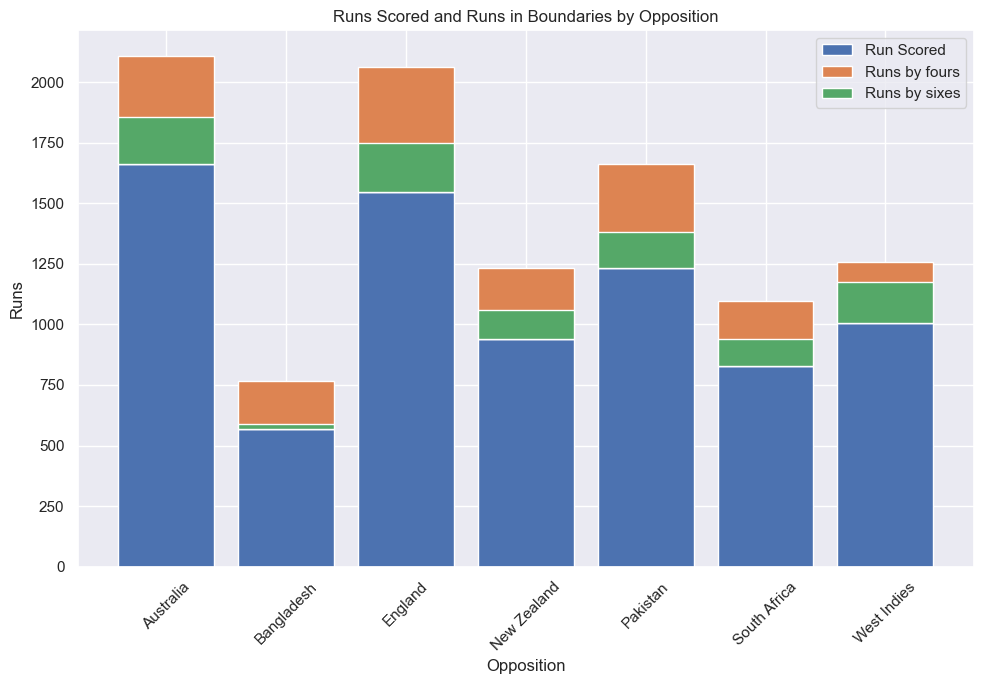

In [46]:
runs_by_boundary = df_filtered[['opposition','runs_scored','fours','sixes']].copy()
#runs_by_boundary['runs_scored_in_boundaries'] = (runs_by_boundary['fours'] * 4) + (runs_by_boundary['sixes'] * 6)
runs_by_boundary['runs_scored_by_fours'] = runs_by_boundary['fours'] * 4
runs_by_boundary['runs_scored_by_sixes'] = runs_by_boundary['sixes'] * 6

group_for_boundary = runs_by_boundary.groupby('opposition').sum().reset_index()

#stacked bar plot
plt.figure(figsize=(10,7))
plt.bar(group_for_boundary['opposition'], group_for_boundary['runs_scored'], label = 'Run Scored')
plt.bar(group_for_boundary['opposition'], group_for_boundary['runs_scored_by_fours'], bottom= group_for_boundary['runs_scored'], label='Runs by fours')
plt.bar(group_for_boundary['opposition'], group_for_boundary['runs_scored_by_sixes'], bottom= group_for_boundary['runs_scored'], label='Runs by sixes')

plt.xlabel('Opposition')
plt.ylabel('Runs')
plt.title('Runs Scored and Runs in Boundaries by Opposition')
plt.legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **IQR & Boxplot for Outliers**
*Example :-*

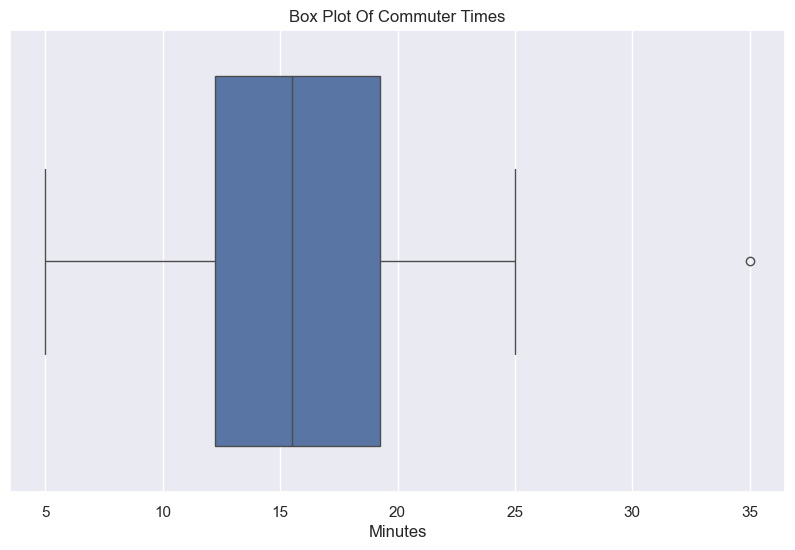

In [47]:
# Data 
commuter_times = [16,8,35,17,13,15,15,5,16,25,20,20,12,10]

# Create Boxplot
plt.figure(figsize=(10,6))
sns.boxplot(data=commuter_times, orient='h')

# Add titles and labels
plt.title("Box Plot Of Commuter Times")
plt.xlabel('Minutes')

# Show the Plot
plt.show()